# Samples (subsets) creation

## Initialization

In [4]:
import json
import os
import sys 
import random
import math
import numpy as np
import pandas as pd
import inspect
import os.path
import matplotlib.pyplot as plt
import heapq
import shutil
from math import atan2,pi

project_root = os.path.abspath(os.path.join('..'))
if project_root not in sys.path:
    sys.path.append(project_root)

print(project_root)

c:\Users\aurel\Documents\GitHub\Code_Thesis_GitHub\Code_Thesis_GitHub


In [5]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from event_model import event_model as em
from validator import validator_lite as vl
import data_analysis.event_generator as eg
from visual.color_map import Colormap

# First try (based on the max neurons number)

In [94]:
def load_event(file_name, plot_event=False):

    f = open(file_name)
    json_data_event = json.loads(f.read())

    ev = em.event(json_data_event, read_tracks=True)

    modules = ev.modules
    tracks = ev.real_tracks

    if plot_event:
        eg.plot_tracks_and_modules(tracks, modules, title="Loaded Event")

    modules_even = []
    modules_odd = []

    for i in range(len(modules)):
        if i % 2 == 0:
            modules_even.append(modules[i])
        else:
            modules_odd.append(modules[i])

    return json_data_event, modules

In [4]:
#event_file_name = "/datasets/minibias/velo_event_"
#file_name = project_root + event_file_name

#src_folder = project_root + "/datasets/minibias/"
#dst_folder = project_root + "/data_analysis/samples_datasets"

## 1. Sampling methods

In [106]:
def sampling_method1_old(data, num_bins):
#> Quantile-based binning: This method involves dividing the data into intervals based on quantiles, 
# such as quartiles or deciles, which split the data into equal parts based on rank.

    # calculate the quantiles to use as bin cutoffs
    quantiles = np.percentile(data, np.linspace(0, 100, num_bins + 1))

    # create the bins by splitting the data based on the quantiles
    bins = np.split(np.array(sorted(data)), np.searchsorted(sorted(data), quantiles[1:]))

    # access each bin as a separate dataset
    for i, bin in enumerate(bins):
        print(f"Bin {i}: {bin[0], bin[-1]} len:{len(bin)} \n {bin} \n")

In [21]:
def sampling_method2(data, num_bins):
#> Equal frequency binning > dividing the data into intervals such that each interval contains
# approximately the same number of data points.

    #sort the data
    data.sort()

    # determine the number of bins needed to have roughly equal frequency in each bin
    bin_size = len(data) // num_bins

    # create the bins by splitting the data into equal segments
    bins = [data[i:i + bin_size] for i in range(0, len(data), bin_size)]

    # add any remaining data points to the last bin
    bins[-1].extend(data[bin_size * num_bins:])

    # access each bin as a separate dataset
    for i, bin in enumerate(bins):
        print(f"Bin {i}: {bin[0], bin[-1]} len:{len(bin)} \n {bin} \n")

## 2. Test of the sampling methods

 ### Minibias

In [130]:
all_events = [i for i in range(995)]
nr_events = len(all_events)

event_file_name = "/datasets/minibias/velo_event_"
file_name = project_root + event_file_name

list_max_neurons =  []
list_hits_total = []
list_neurons_total = []

for i in all_events[:nr_events]:
        #size = os.path.getsize(file_name + str(i) + ".json")
        json_data_event, modules = load_event(file_name + str(i) + ".json", plot_event=False)

        modules_count = len(modules)

        hit_counts = [len(module.hits()) for module in modules]
        hits_total = sum(hit_counts)
        list_hits_total.append(hits_total)

        neuron_count = [
            hit_counts[i] * hit_counts[i + 1]
            for i in range(modules_count - 1)
            ]
        neurons_total = sum(neuron_count)
        list_neurons_total.append(neurons_total)

        max_neurons = max(neuron_count)
        list_max_neurons.append(max_neurons)


In [136]:
sampling_method1(list_max_neurons, 5)

Bin 0: (4, 713) len:199 
 [  4   8  10  20  25  30  30  36  36  49  49  55  56  56  66  66  70  72
  84  91  91  91  96  99  99 104 108 112 117 119 120 120 120 121 121 128
 130 130 132 132 132 132 143 143 147 150 154 160 170 180 182 182 182 192
 196 200 210 225 238 240 240 242 243 247 252 252 252 255 264 266 272 272
 280 280 280 285 288 289 304 304 312 320 322 323 323 330 336 336 338 342
 345 345 357 360 360 360 363 368 378 380 391 396 400 414 418 420 420 425
 435 437 440 441 441 456 459 460 462 462 462 480 483 483 486 500 500 504
 504 504 504 504 506 506 506 513 513 518 522 522 525 525 525 528 528 528
 528 540 540 550 561 567 572 572 572 572 575 576 589 594 594 598 598 598
 600 600 608 616 616 616 616 620 624 624 624 627 630 630 640 640 640 644
 648 650 651 651 660 672 672 675 676 690 690 690 693 696 700 702 702 704
 713] 

Bin 1: (714, 1620) len:199 
 [ 714  714  726  728  728  728  744  744  744  744  750  756  759  760
  775  780  783  792  792  792  792  798  806  810  816  828  8

In [134]:
sampling_method2(list_max_neurons, 5)

Bin 0: (4, 713) len:199 
 [4, 8, 10, 20, 25, 30, 30, 36, 36, 49, 49, 55, 56, 56, 66, 66, 70, 72, 84, 91, 91, 91, 96, 99, 99, 104, 108, 112, 117, 119, 120, 120, 120, 121, 121, 128, 130, 130, 132, 132, 132, 132, 143, 143, 147, 150, 154, 160, 170, 180, 182, 182, 182, 192, 196, 200, 210, 225, 238, 240, 240, 242, 243, 247, 252, 252, 252, 255, 264, 266, 272, 272, 280, 280, 280, 285, 288, 289, 304, 304, 312, 320, 322, 323, 323, 330, 336, 336, 338, 342, 345, 345, 357, 360, 360, 360, 363, 368, 378, 380, 391, 396, 400, 414, 418, 420, 420, 425, 435, 437, 440, 441, 441, 456, 459, 460, 462, 462, 462, 480, 483, 483, 486, 500, 500, 504, 504, 504, 504, 504, 506, 506, 506, 513, 513, 518, 522, 522, 525, 525, 525, 528, 528, 528, 528, 540, 540, 550, 561, 567, 572, 572, 572, 572, 575, 576, 589, 594, 594, 598, 598, 598, 600, 600, 608, 616, 616, 616, 616, 620, 624, 624, 624, 627, 630, 630, 640, 640, 640, 644, 648, 650, 651, 651, 660, 672, 672, 675, 676, 690, 690, 690, 693, 696, 700, 702, 702, 704, 713] 

Bin

### Bsphiphi

In [138]:
all_events = [i for i in range(1000)]
nr_events = len(all_events)

event_file_name = "/datasets/bsphiphi/velo_event_"
file_name = project_root + event_file_name

list_max_neurons =  []
list_hits_total = []
list_neurons_total = []

for i in all_events[:nr_events]:
        #size = os.path.getsize(file_name + str(i) + ".json")
        json_data_event, modules = load_event(file_name + str(i) + ".json", plot_event=False)

        modules_count = len(modules)

        hit_counts = [len(module.hits()) for module in modules]
        hits_total = sum(hit_counts)
        list_hits_total.append(hits_total)

        neuron_count = [
            hit_counts[i] * hit_counts[i + 1]
            for i in range(modules_count - 1)
            ]
        neurons_total = sum(neuron_count)
        list_neurons_total.append(neurons_total)

        max_neurons = max(neuron_count)
        list_max_neurons.append(max_neurons)

In [139]:
sampling_method1(list_max_neurons, 5)

Bin 0: (90, 1419) len:200 
 [  90  105  110  117  154  154  156  156  160  209  221  272  322  324
  330  336  336  368  378  384  396  408  408  414  420  420  432  432
  432  459  460  475  476  480  486  500  504  506  506  506  510  525
  528  529  540  544  552  570  572  572  575  580  621  621  621  638
  644  646  648  660  667  667  667  690  693  702  702  720  720  728
  729  736  750  750  754  756  756  759  768  775  780  780  783  783
  783  784  784  805  805  806  812  812  816  840  840  841  851  864
  864  868  870  875  884  884  896  896  902  925  928  930  936  950
  952  957  957  957  957  961  975  980  980  984  986  986  986  990
  990 1015 1015 1023 1023 1025 1050 1050 1050 1056 1056 1056 1064 1073
 1073 1075 1080 1085 1085 1085 1085 1088 1088 1107 1110 1110 1120 1120
 1122 1122 1131 1140 1140 1147 1148 1148 1155 1173 1188 1188 1190 1190
 1209 1224 1225 1232 1240 1247 1260 1260 1260 1271 1276 1280 1280 1292
 1292 1312 1312 1326 1330 1330 1330 1332 1334 136

In [140]:
sampling_method2(list_max_neurons, 5)

Bin 0: (90, 1419) len:200 
 [90, 105, 110, 117, 154, 154, 156, 156, 160, 209, 221, 272, 322, 324, 330, 336, 336, 368, 378, 384, 396, 408, 408, 414, 420, 420, 432, 432, 432, 459, 460, 475, 476, 480, 486, 500, 504, 506, 506, 506, 510, 525, 528, 529, 540, 544, 552, 570, 572, 572, 575, 580, 621, 621, 621, 638, 644, 646, 648, 660, 667, 667, 667, 690, 693, 702, 702, 720, 720, 728, 729, 736, 750, 750, 754, 756, 756, 759, 768, 775, 780, 780, 783, 783, 783, 784, 784, 805, 805, 806, 812, 812, 816, 840, 840, 841, 851, 864, 864, 868, 870, 875, 884, 884, 896, 896, 902, 925, 928, 930, 936, 950, 952, 957, 957, 957, 957, 961, 975, 980, 980, 984, 986, 986, 986, 990, 990, 1015, 1015, 1023, 1023, 1025, 1050, 1050, 1050, 1056, 1056, 1056, 1064, 1073, 1073, 1075, 1080, 1085, 1085, 1085, 1085, 1088, 1088, 1107, 1110, 1110, 1120, 1120, 1122, 1122, 1131, 1140, 1140, 1147, 1148, 1148, 1155, 1173, 1188, 1188, 1190, 1190, 1209, 1224, 1225, 1232, 1240, 1247, 1260, 1260, 1260, 1271, 1276, 1280, 1280, 1292, 1292, 1

## 3. Creation of the subsets

The sampling method 2 was selected for this research because it allows to have at least 10 events in each subsets.

In [141]:
def meets_characteristic(json_data_event, modules, min, max):
    modules_count = len(modules)
    hit_counts = [len(module.hits()) for module in modules]
    hits_total = sum(hit_counts)
    neuron_count = [
        hit_counts[i] * hit_counts[i + 1]
        for i in range(modules_count - 1)
        ]
    max_neurons = heapq.nlargest(1, neuron_count)[0]

    if min < max_neurons <= max:
        return True
    return False

In [142]:
def create_characteristic_dataset(dataset, nr_events, min, max):

    destination_folder = project_root + "\datasets\samples\\"+ dataset + "\Samples_"+ str(min) +"_to_"+str(max)+"_neurons"
    os.mkdir(destination_folder)

    file_name = project_root + ("/datasets/"+ dataset +"/velo_event_")
    
    all_events = [i for i in range(nr_events)]


    for i in all_events[:nr_events]:
        size = os.path.getsize(file_name + str(i) + ".json")
        src_file = (file_name + str(i) + ".json")
        json_data_event, modules = load_event(file_name + str(i) + ".json", plot_event=False)

     
        if meets_characteristic(json_data_event, modules, min, max):
            dst_file = os.path.join(destination_folder,os.path.basename(src_file))
            shutil.copy(src_file,dst_file)
    

In [97]:
dataset = "minibias"
create_characteristic_dataset(dataset, 995, 0, 713)
create_characteristic_dataset(dataset, 995, 713, 1620)
create_characteristic_dataset(dataset, 995, 1620, 2784)
create_characteristic_dataset(dataset, 995, 2784, 4492)
create_characteristic_dataset(dataset, 995, 4492, 22436)


In [143]:
dataset = "bsphiphi"
create_characteristic_dataset(dataset, 1000, 0, 1419)
create_characteristic_dataset(dataset, 1000, 1419, 2500)
create_characteristic_dataset(dataset, 1000, 2500, 3900)
create_characteristic_dataset(dataset, 1000, 3900, 6084)
create_characteristic_dataset(dataset, 1000, 6084, 40145)

# Second try (based on max neurons number)

In [8]:
def load_event(file_name, plot_event=False):
    f = open(file_name)
    json_data_event = json.loads(f.read())

    ev = em.event(json_data_event, read_tracks=True)

    modules = ev.modules
    tracks = ev.real_tracks

    if plot_event:
        eg.plot_tracks_and_modules(tracks, modules, title="Loaded Event")

    modules_even = []
    modules_odd = []

    for i in range(len(modules)):
        if i % 2 == 0:
            modules_even.append(modules[i])
        else:
            modules_odd.append(modules[i])

    return json_data_event, (modules_even, modules_odd)

In [75]:
def events_deciles_selection(max_neurons_list, nr_samples):

    deciles = np.percentile((max_neurons_list), np.arange(0, 100, nr_samples))
    deciles_round = [round(x) for x in deciles]

    events_selection_list = []
    for dec in deciles_round:
        for i, value in enumerate(max_neurons_list):
            if value == dec:
                events_selection_list.append(i)
                break

            elif value == (dec + 1):
                events_selection_list.append(i)
                break

            elif value == (dec - 1):
                events_selection_list.append(i)
                break

            elif value == (dec + 2):
                events_selection_list.append(i)
                break

            elif value == (dec - 2):
                events_selection_list.append(i)
                break
    
    return events_selection_list

In [76]:
def meets_characteristic_test(i, list, nr_samples):

    events_selection_list = events_deciles_selection(list, nr_samples)
    
    if i in events_selection_list:
        return True
    return False

In [65]:
def create_characteristic_dataset(dataset, nr_events, nr_samples):


    destination_folder = project_root + "\datasets\samples\\"+ dataset + "\Deciles_Samples_"+ str(nr_samples)+"events"

    os.mkdir(destination_folder)

    file_name = project_root + ("/datasets/"+ dataset +"/velo_event_")
    

    ### 1. Calculate the max neurons list for each event

    all_events = [i for i in range(nr_events)]
    max_neurons_list = []

    for i in all_events[:nr_events]:
        size = os.path.getsize(file_name + str(i) + ".json")
        src_file = (file_name + str(i) + ".json")
        json_data_event, modules = load_event(file_name + str(i) + ".json", plot_event=False)

        max_neurons = 0
        last = 1

        for m in modules[0]: #for all even modules
                n_hits = len(m.hits()) #number of hits in each module

                if last * n_hits > max_neurons: 
                    max_neurons = last * n_hits
                last = n_hits

        last = 1

        for m in modules[1]:# for all odd modules
                n_hits = len(m.hits())
                if last * n_hits > max_neurons:
                   max_neurons = last * n_hits
                last = n_hits

        max_neurons_list.append(max_neurons)

    list = max_neurons_list
    print(list)
    
    
### 2. Create a list with the indexes of the events selected
    events_selection_list = events_deciles_selection(list, nr_samples)
    print()
    print(events_selection_list)

    return events_selection_list


In [81]:
def create_characteristic_dataset_test(dataset, nr_events, nr_samples):


    destination_folder = project_root + "\datasets\samples\\"+ dataset + "\Deciles_Samples_"+ str(nr_samples)+"events"

    os.mkdir(destination_folder)

    file_name = project_root + ("/datasets/"+ dataset +"/velo_event_")
    

    ### 1. Calculate the max neurons list for each event

    all_events = [i for i in range(nr_events)]
    max_neurons_list = []

    for i in all_events[:nr_events]:
        size = os.path.getsize(file_name + str(i) + ".json")
        src_file = (file_name + str(i) + ".json")
        json_data_event, modules = load_event(file_name + str(i) + ".json", plot_event=False)

        max_neurons = 0
        last = 1

        for m in modules[0]: #for all even modules
                n_hits = len(m.hits()) #number of hits in each module

                if last * n_hits > max_neurons: 
                    max_neurons = last * n_hits
                last = n_hits

        last = 1

        for m in modules[1]:# for all odd modules
                n_hits = len(m.hits())
                if last * n_hits > max_neurons:
                   max_neurons = last * n_hits
                last = n_hits

        max_neurons_list.append(max_neurons)

    list = max_neurons_list
    print(list)        
    

    for i in all_events[:nr_events]:
        if meets_characteristic_test(i, list, nr_samples):
            print(i)
            dst_file = os.path.join(destination_folder,os.path.basename(src_file))
            shutil.copy(src_file,dst_file)

In [83]:
create_characteristic_dataset_test('bsphiphi', 1000, 10)

[3360, 1560, 6555, 7568, 1088, 3240, 4416, 5846, 1720, 3360, 6006, 952, 5832, 2968, 9312, 5852, 3904, 1122, 4331, 8928, 2300, 9506, 6560, 1122, 2970, 4690, 7743, 1156, 3922, 1225, 2350, 7740, 6642, 6723, 1890, 8930, 4896, 10600, 3480, 5037, 4680, 6642, 5624, 3654, 3304, 1036, 5925, 3528, 4964, 2968, 6059, 225, 9306, 5698, 4556, 550, 2756, 3304, 6724, 6889, 3600, 5472, 6160, 990, 3540, 3904, 4331, 2912, 3420, 5184, 7138, 1886, 3304, 6699, 1764, 1400, 2964, 2064, 6237, 4752, 4480, 812, 2070, 1122, 2024, 11342, 1394, 6240, 1890, 1932, 2295, 1295, 4544, 1330, 7743, 2756, 437, 7728, 8928, 6318, 3360, 3795, 5846, 5256, 4830, 4690, 1440, 2064, 4818, 4556, 2550, 899, 621, 4032, 12432, 5846, 1840, 2021, 1517, 4422, 5928, 6642, 6006, 4410, 1936, 4026, 1015, 3904, 8084, 1681, 5112, 1680, 8550, 7387, 5476, 4484, 3900, 6560, 3717, 1600, 2704, 5256, 4352, 7310, 4290, 4550, 12204, 4692, 6160, 952, 13224, 2915, 5476, 868, 5609, 11448, 4692, 7920, 3245, 4550, 1935, 4026, 4224, 5475, 12852, 6320, 408, 3

# Third try (based on max neurons number)

In [87]:
import os
import shutil


def create_subset_dataset(src_folder, dst_folder, indices):

    # Get a list of all files in the src folder
    file_list = os.listdir(src_folder)
    # Iterate through each file
    for file in file_list:
        src_file = os.path.join(src_folder, file)
        # Extract the index from the file name
        index = int(file.split("_")[1].split(".")[0])
        # Check if the index is in the list of desired indices
        if index in indices:
            dst_file = os.path.join(dst_folder, file)
            shutil.copy(src_file, dst_file)


# Use the function to create a subset dataset
#create_subset_dataset("complete_dataset", "subset_dataset", [1, 2, 3, 4, 5])


In [86]:
# GET THE MAX NEURONS
file_name = project_root + "/datasets/minibias/velo_event_"

all_events = [i for i in range(995)]
#random.seed(40)
#random.shuffle(all_events)
count = 0
j = 0
nr_events = len(all_events)

max_neurons_list = []
while count < nr_events:
        i = all_events[j]
        j += 1
        
        size = os.path.getsize(file_name + str(i) + ".json")
        #print("[INFO] Evaluate Event: %s" % file_name + str(i))
        json_data_event, modules = load_event(file_name + str(i) + ".json", plot_event=False)
        
        max_neurons = 0
        last = 1

        for m in modules[0]: #for all even modules
                n_hits = len(m.hits()) #number of hits in each module

                if last * n_hits > max_neurons: 
                    max_neurons = last * n_hits
                last = n_hits

        last = 1

        for m in modules[1]:# for all odd modules
                n_hits = len(m.hits())
                if last * n_hits > max_neurons:
                   max_neurons = last * n_hits
                last = n_hits
        
        max_neurons_list.append(max_neurons)
        count = count + 1


In [88]:
def events_closest_deciles(max_neurons_list,nr_samples):

    deciles = np.percentile((max_neurons_list), np.arange(0, 100, nr_samples))
    deciles_round = [round(x) for x in deciles]

    def closest_index(lst, K):
        return min(enumerate(lst), key=lambda x: abs(x[1] - K))[0]

    events_selected_list=[]

    for dec in deciles_round:
        close = closest_index(max_neurons_list, dec)
        events_selected_list.append(close)
    
    return events_selected_list

In [90]:
# GET THE SELECTED ID
list = events_closest_deciles(max_neurons_list,10)
print(list)

[655, 853, 231, 769, 293, 164, 1, 122, 837, 936]


In [97]:
# GET THE SOURCE AND DESTINATION FOLDER

src_folder = project_root + ("/datasets/minibias/")
dst_folder = project_root  + ("/datasets/minibias/samples/test_mini")

In [98]:
for value in list:
    for filename in os.listdir(src_folder):
        if filename.endswith('{value}.json'): #and filename.startswith('example'):
            src_path = os.path.join(src_folder, filename)
            dst_path = os.path.join(dst_folder, filename)
            shutil.copy2(src_path, dst_path)

# Fourth try (based on max neurons number)

In [10]:
# Creation of the datasets
def load_event(file_name, plot_event=False):
    f = open(file_name)
    json_data_event = json.loads(f.read())

    ev = em.event(json_data_event, read_tracks=True)

    modules = ev.modules
    tracks = ev.real_tracks

    if plot_event:
        eg.plot_tracks_and_modules(tracks, modules, title="Loaded Event")

    modules_even = []
    modules_odd = []

    for i in range(len(modules)):
        if i % 2 == 0:
            modules_even.append(modules[i])
        else:
            modules_odd.append(modules[i])

    return json_data_event, (modules_even, modules_odd)


In [124]:
def sampling_method1(data, num_bins):
#> Quantile-based binning: This method involves dividing the data into intervals based on quantiles, 
# such as quartiles or deciles, which split the data into equal parts based on rank.

    list_bins_limit = []
    # calculate the quantiles to use as bin cutoffs
    quantiles = np.percentile(data, np.linspace(0, 100, num_bins + 1))

    # create the bins by splitting the data based on the quantiles
    bins = np.split(np.array(sorted(data)), np.searchsorted(sorted(data), quantiles[1:]))

    # If the last bin has fewer than num_bins elements, add the remaining elements to the last bin
    if len(bins[-1]) < num_bins:
        bins[-2] = np.concatenate((bins[-2], bins[-1]))
        bins.pop()

    # access each bin as a separate dataset
    for i, bin in enumerate(bins):
        list_bins_limit.append((bin[0], bin[-1]))
        print(f"Bin {i}: {bin[0], bin[-1]} len:{len(bin)} \n {bin} \n")

    return list_bins_limit


In [118]:
def sampling_method2(data, num_bins):
#> Equal frequency binning > dividing the data into intervals such that each interval contains
# approximately the same number of data points.

    list_bins_limit = []

    #sort the data
    data.sort()

    # determine the number of bins needed to have roughly equal frequency in each bin
    bin_size = len(data) // num_bins

    # create the bins by splitting the data into equal segments
    bins = [data[i:i + bin_size] for i in range(0, len(data), bin_size)]

    # add any remaining data points to the last bin
    bins[-1].extend(data[bin_size * num_bins:])

    # access each bin as a separate dataset
    for i, bin in enumerate(bins):
        list_bins_limit.append((bin[0], bin[-1]))
        print(f"Bin {i}: {bin[0], bin[-1]} len:{len(bin)} \n {bin} \n")
        
    return list_bins_limit
        


In [119]:
def meets_characteristic(modules, tuple):
    max_neurons = 0
    last = 1

    for m in modules[0]: #for all even modules
        n_hits = len(m.hits()) #number of hits in each module

        if last * n_hits > max_neurons: 
            max_neurons = last * n_hits
        last = n_hits

    last = 1

    for m in modules[1]:# for all odd modules
        n_hits = len(m.hits())
        if last * n_hits > max_neurons:
            max_neurons = last * n_hits
        last = n_hits

    if tuple[0] <= max_neurons <= tuple[1]:
        return True
    return False

In [120]:
def create_characteristic_dataset(dataset, nr_events, tuple):

    destination_folder = project_root + "\datasets\samples\\"+ dataset + "\Samples_"+ str(tuple[0]) +"_to_"+str(tuple[1])+"_neurons"
    os.mkdir(destination_folder)

    file_name = project_root + ("/datasets/"+ dataset +"/velo_event_")
    
    all_events = [i for i in range(nr_events)]


    for i in all_events[:nr_events]:
        size = os.path.getsize(file_name + str(i) + ".json")
        src_file = (file_name + str(i) + ".json")
        json_data_event, modules = load_event(file_name + str(i) + ".json", plot_event=False)

        if meets_characteristic(modules, tuple):
            dst_file = os.path.join(destination_folder,os.path.basename(src_file))
            shutil.copy(src_file,dst_file)
    

## Minibias

### 1. Get the bins values

In [95]:
file_name = project_root + "/datasets/minibias/velo_event_"

all_events = [i for i in range(995)]
#random.seed(40)
#random.shuffle(all_events)
count = 0
j = 0
nr_events = len(all_events)

max_neurons_list_minibias = []
all_events_list = []

for i in all_events[:nr_events]:

        size = os.path.getsize(file_name + str(i) + ".json")
        json_data_event, modules = load_event(file_name + str(i) + ".json", plot_event=False)
        
        #data
        all_events_list.append(json_data_event)
        
        #neurons
        max_neurons = 0
        last = 1

        for m in modules[0]: #for all even modules
                n_hits = len(m.hits()) #number of hits in each module

                if last * n_hits > max_neurons: 
                    max_neurons = last * n_hits
                last = n_hits

        last = 1

        for m in modules[1]:# for all odd modules
                n_hits = len(m.hits())
                if last * n_hits > max_neurons:
                   max_neurons = last * n_hits
                last = n_hits
        
        max_neurons_list_minibias.append(max_neurons)


In [96]:
print(len(all_events_list))
print(len(max_neurons_list_minibias))

995
995


In [97]:
print(max_neurons_list_minibias)

[1444, 3306, 30, 7832, 3306, 6715, 7872, 575, 625, 4968, 3480, 6640, 899, 1368, 1116, 121, 3024, 1088, 1156, 10400, 675, 110, 240, 2193, 7395, 840, 2650, 783, 1296, 4896, 598, 4830, 1849, 5476, 924, 121, 812, 480, 380, 324, 6480, 506, 2499, 1440, 12390, 3422, 1763, 1720, 3025, 1517, 3540, 1444, 2496, 1054, 10920, 1554, 5994, 1806, 2115, 2162, 4488, 529, 4225, 8280, 2254, 240, 7055, 5688, 5040, 10200, 224, 1505, 858, 1152, 361, 2304, 2484, 1224, 16899, 2162, 9797, 272, 210, 156, 3906, 7644, 3132, 6083, 1330, 6156, 1295, 3520, 1892, 4096, 5700, 3024, 378, 6083, 528, 3780, 1152, 3720, 4970, 2597, 1517, 3024, 2070, 1480, 7462, 2448, 1558, 4900, 992, 1760, 3906, 2530, 928, 1716, 1122, 7743, 2499, 195, 4288, 4620, 6622, 256, 3245, 3024, 11984, 462, 9310, 18060, 1120, 1332, 1216, 1517, 7052, 1287, 990, 3363, 2544, 2244, 992, 780, 1974, 7462, 1056, 7568, 36, 4692, 3538, 360, 5852, 5700, 4692, 2025, 3968, 676, 8463, 3306, 5396, 180, 441, 3021, 2601, 9024, 1600, 3304, 5040, 1978, 7395, 1634, 123

In [125]:
#Bins creation
tuples_minibias = sampling_method1(max_neurons_list_minibias,10)

Bin 0: (12, 484) len:100 
 [ 12  16  20  20  30  30  36  36  36  49  63  64  72  80  81  99 110 110
 121 121 121 144 144 154 156 156 156 156 156 156 165 168 169 180 182 182
 182 195 195 204 208 210 210 210 210 210 224 225 225 234 240 240 240 252
 256 256 272 272 288 306 306 315 324 324 357 360 360 360 360 360 361 361
 361 378 378 380 380 380 380 380 399 399 400 400 400 408 440 440 441 441
 460 460 462 462 462 462 480 483 484 484] 

Bin 1: (504, 928) len:97 
 [504 504 506 506 506 525 525 528 528 529 550 552 552 552 552 567 575 575
 575 576 598 598 600 621 621 624 624 625 625 625 638 650 650 650 650 667
 675 675 675 675 676 676 676 696 700 702 713 725 725 726 728 729 750 754
 756 756 756 777 780 783 783 784 784 784 784 784 784 806 810 812 812 812
 812 812 812 840 840 840 840 840 840 858 868 868 868 870 899 899 900 900
 924 924 924 924 928 928 928] 

Bin 2: (930, 1369) len:102 
 [ 930  930  930  930  930  960  960  960  960  961  961  961  961  990
  990  992  992  992  992  992  992  992

In [126]:
for tuple in tuples_minibias:
    print(tuple)

(12, 484)
(504, 928)
(930, 1369)
(1404, 1920)
(1935, 2600)
(2601, 3304)
(3306, 4284)
(4288, 5644)
(5680, 7920)
(7998, 26080)


### 2. Create the subsets

In [127]:
for tuple in tuples_minibias:
    create_characteristic_dataset("minibias",995,tuple)

## Bsphiphi


In [109]:
file_name = project_root + "/datasets/bsphiphi/velo_event_"

all_events = [i for i in range(1000)]
#random.seed(40)
#random.shuffle(all_events)
count = 0
j = 0
nr_events = len(all_events)

max_neurons_list_bsphiphi = []
all_events_list_bsphiphi = []

for i in all_events[:nr_events]:

        size = os.path.getsize(file_name + str(i) + ".json")
        json_data_event, modules = load_event(file_name + str(i) + ".json", plot_event=False)
        
        #data
        all_events_list_bsphiphi.append(json_data_event)
        
        #neurons
        max_neurons = 0
        last = 1

        for m in modules[0]: #for all even modules
                n_hits = len(m.hits()) #number of hits in each module

                if last * n_hits > max_neurons: 
                    max_neurons = last * n_hits
                last = n_hits

        last = 1

        for m in modules[1]:# for all odd modules
                n_hits = len(m.hits())
                if last * n_hits > max_neurons:
                   max_neurons = last * n_hits
                last = n_hits
        
        max_neurons_list_bsphiphi.append(max_neurons)


In [128]:
print(len(all_events_list_bsphiphi))
print(len(max_neurons_list_bsphiphi))

1000
1000


In [129]:
#Bins creation
tuples_bsphiphi = sampling_method1(max_neurons_list_bsphiphi,10)


Bin 0: (121, 1054) len:97 
 [ 121  156  169  169  182  225  225  240  272  272  289  304  324  380
  399  408  437  440  504  506  506  528  528  550  550  552  575  575
  575  600  600  600  621  638  650  650  650  651  667  672  675  696
  702  720  725  728  728  728  728  729  750  754  754  780  780  780
  783  784  784  810  812  840  840  841  858  864  868  868  868  870
  899  899  900  900  900  928  930  930  930  952  952  952  952  957
  960  990  990  992 1015 1015 1020 1023 1023 1024 1036 1054 1054] 

Bin 1: (1056, 1720) len:103 
 [1056 1056 1056 1056 1085 1088 1088 1088 1088 1089 1089 1120 1120 1122
 1122 1122 1122 1122 1122 1122 1147 1155 1155 1155 1156 1156 1156 1188
 1190 1190 1221 1224 1224 1225 1225 1225 1225 1260 1260 1292 1295 1296
 1296 1330 1332 1360 1368 1368 1368 1368 1369 1369 1394 1394 1400 1404
 1404 1404 1406 1406 1406 1428 1440 1440 1443 1443 1443 1444 1476 1480
 1480 1482 1517 1517 1520 1521 1540 1548 1554 1558 1560 1560 1560 1596
 1599 1600 1600 1640 

In [130]:
for tuple in tuples_bsphiphi:
    print(tuple)

(121, 1054)
(1056, 1720)
(1722, 2295)
(2300, 2968)
(2970, 3720)
(3721, 4544)
(4550, 5550)
(5600, 7040)
(7052, 8832)
(8835, 45787)


### 2. Create the subsets

In [131]:
### 2. Create the subsets
for tuple in tuples_bsphiphi:
    create_characteristic_dataset("bsphiphi", 1000, tuple)

# Five try (based on number of hits by event this time)

In [43]:
# Creation of the datasets
def load_event(file_name, plot_event=False):
    f = open(file_name)
    json_data_event = json.loads(f.read())

    ev = em.event(json_data_event, read_tracks=True)

    modules = ev.modules
    tracks = ev.real_tracks

    if plot_event:
        eg.plot_tracks_and_modules(tracks, modules, title="Loaded Event")

    modules_even = []
    modules_odd = []

    for i in range(len(modules)):
        if i % 2 == 0:
            modules_even.append(modules[i])
        else:
            modules_odd.append(modules[i])

    return json_data_event, modules


In [5]:
def sampling_method1(data, num_bins):
#> Quantile-based binning: This method involves dividing the data into intervals based on quantiles, 
# such as quartiles or deciles, which split the data into equal parts based on rank.

    list_bins_limit = []
    # calculate the quantiles to use as bin cutoffs
    quantiles = np.percentile(data, np.linspace(0, 100, num_bins + 1))

    # create the bins by splitting the data based on the quantiles
    bins = np.split(np.array(sorted(data)), np.searchsorted(sorted(data), quantiles[1:]))

    # If the last bin has fewer than num_bins elements, add the remaining elements to the last bin
    if len(bins[-1]) < num_bins:
        bins[-2] = np.concatenate((bins[-2], bins[-1]))
        bins.pop()

    # access each bin as a separate dataset
    for i, bin in enumerate(bins):
        list_bins_limit.append((bin[0], bin[-1]))
        print(f"Bin {i}: {bin[0], bin[-1]} len:{len(bin)} \n {bin} \n")

    return list_bins_limit

In [19]:
def meets_characteristic(modules, tuple):
    
    hit_counts = [len(module.hits()) for module in modules]
    hits_total = sum(hit_counts)

    if tuple[0] <= hits_total <= tuple[1]:
        return True
    return False

In [20]:
def create_characteristic_dataset(dataset, nr_events, tuple):

    destination_folder = project_root + "\datasets\samples\\" + dataset + "_samples_hits\\"+"\Samples_"+ str(tuple[0]) +"_to_"+str(tuple[1])+"_hits"
    os.mkdir(destination_folder)

    file_name = project_root + ("/datasets/"+ dataset +"/velo_event_")
    
    all_events = [i for i in range(nr_events)]


    for i in all_events[:nr_events]:
        size = os.path.getsize(file_name + str(i) + ".json")
        src_file = (file_name + str(i) + ".json")
        json_data_event, modules = load_event(file_name + str(i) + ".json", plot_event=False)

        if meets_characteristic(modules, tuple):
            dst_file = os.path.join(destination_folder,os.path.basename(src_file))
            shutil.copy(src_file,dst_file)
    

## Minibias

In [44]:
file_name = project_root + "/datasets/minibias/velo_event_"

all_events = [i for i in range(10)]
#random.seed(40)
#random.shuffle(all_events)
count = 0
j = 0
nr_events = len(all_events)

max_neurons_list_minibias = []
total_hits_list = []
all_events_list = []


for i in all_events[:nr_events]:

        size = os.path.getsize(file_name + str(i) + ".json")
        json_data_event, modules = load_event(file_name + str(i) + ".json", plot_event=False)
        
        #data
        all_events_list.append(json_data_event)
        

        #hits
        modules_count = len(modules)

        hit_counts = [len(module.hits()) for module in modules]
        hits_total = sum(hit_counts)
        total_hits_list.append(hits_total)


In [45]:
print(total_hits_list)


[996, 2422, 135, 3172, 2089, 3147, 2938, 890, 767, 3070]


In [17]:
list_bins_minibias = sampling_method1(total_hits_list, 10)

Bin 0: (51, 663) len:100 
 [ 51  78  89 110 129 135 143 162 163 179 187 197 202 212 216 222 227 250
 264 267 281 285 292 316 316 318 320 328 337 340 343 345 352 360 362 366
 371 375 376 378 380 383 385 393 399 403 403 408 422 424 424 426 434 450
 462 463 466 468 473 481 484 490 496 503 503 506 511 519 523 534 540 541
 543 550 561 566 575 576 583 584 587 589 593 595 599 603 605 608 620 636
 639 641 644 645 646 647 647 659 661 663] 

Bin 1: (664, 978) len:99 
 [664 668 669 678 682 683 683 693 700 712 718 721 726 734 737 738 738 743
 755 761 763 767 769 772 777 778 783 784 793 794 801 803 807 811 812 812
 812 816 820 823 824 825 826 829 833 856 859 860 860 863 864 866 867 868
 870 872 874 875 876 877 877 882 883 886 887 888 890 891 901 901 903 903
 906 907 908 910 917 920 922 923 923 926 928 937 939 941 943 946 954 954
 955 955 957 967 970 973 976 977 978] 

Bin 2: (980, 1255) len:99 
 [ 980  982  983  987  991  996  997  999 1000 1001 1002 1005 1006 1008
 1010 1012 1013 1017 1020 1022 10

In [24]:
for tuple in list_bins_minibias:
    print(tuple)

(51, 663)
(664, 978)
(980, 1255)
(1257, 1549)
(1550, 1812)
(1819, 2119)
(2121, 2464)
(2468, 2853)
(2854, 3405)
(3412, 6786)


In [25]:
### 2. Create the subsets
for tuple in list_bins_minibias:
    create_characteristic_dataset("minibias", 995, tuple)

## Bsphiphi

In [26]:
file_name = project_root + "/datasets/bsphiphi/velo_event_"

all_events = [i for i in range(995)]
#random.seed(40)
#random.shuffle(all_events)
count = 0
j = 0
nr_events = len(all_events)

total_hits_list_bsphiphi = []
all_events_list = []


for i in all_events[:nr_events]:

        size = os.path.getsize(file_name + str(i) + ".json")
        json_data_event, modules = load_event(file_name + str(i) + ".json", plot_event=False)
        
        #data
        all_events_list.append(json_data_event)
        
        #hits
        modules_count = len(modules)
        hit_counts = [len(module.hits()) for module in modules]
        hits_total = sum(hit_counts)
        total_hits_list_bsphiphi.append(hits_total)

In [27]:
print(len(total_hits_list_bsphiphi))

995


In [28]:
list_bins_bsphiphi = sampling_method1(total_hits_list_bsphiphi, 10)

Bin 0: (336, 1118) len:100 
 [ 336  351  370  388  399  403  417  417  435  459  460  475  486  499
  561  569  634  666  679  687  702  706  715  727  729  738  743  747
  751  778  791  794  796  806  806  811  811  819  820  820  846  848
  849  856  864  872  873  878  880  893  897  907  911  916  917  918
  918  934  934  953  955  957  968  974  976  981  984  987  991  993
 1003 1004 1005 1009 1013 1021 1024 1038 1040 1046 1048 1052 1055 1057
 1062 1069 1069 1071 1071 1076 1088 1093 1093 1094 1107 1107 1113 1115
 1116 1118] 

Bin 1: (1130, 1450) len:99 
 [1130 1132 1133 1134 1137 1137 1140 1141 1143 1148 1149 1149 1150 1155
 1156 1158 1161 1166 1167 1170 1170 1171 1173 1174 1175 1181 1184 1187
 1193 1207 1223 1223 1231 1238 1240 1241 1243 1243 1247 1252 1255 1255
 1266 1273 1281 1295 1300 1301 1303 1305 1313 1316 1316 1318 1319 1323
 1327 1328 1331 1334 1342 1342 1347 1359 1360 1364 1366 1367 1369 1373
 1381 1385 1387 1391 1396 1396 1397 1403 1404 1404 1406 1410 1410 1415
 1425

In [29]:
### 2. Create the subsets
for tuple in list_bins_bsphiphi:
    create_characteristic_dataset("bsphiphi", 1000, tuple)

# Creation a subset with 10 events but based on the hits this time

In [7]:
# Creation of the datasets
def load_event(file_name, plot_event=False):
    f = open(file_name)
    json_data_event = json.loads(f.read())

    ev = em.event(json_data_event, read_tracks=True)

    modules = ev.modules
    tracks = ev.real_tracks

    if plot_event:
        eg.plot_tracks_and_modules(tracks, modules, title="Loaded Event")

    modules_even = []
    modules_odd = []

    for i in range(len(modules)):
        if i % 2 == 0:
            modules_even.append(modules[i])
        else:
            modules_odd.append(modules[i])

    return json_data_event, modules


### Minibias 

In [10]:
file_name = project_root + "/datasets/minibias/velo_event_"

all_events = [i for i in range(995)]
#random.seed(40)
#random.shuffle(all_events)
count = 0
j = 0
nr_events = len(all_events)

max_neurons_list_minibias = []
total_hits_list = []
all_events_list = []


for i in all_events[:nr_events]:

        size = os.path.getsize(file_name + str(i) + ".json")
        json_data_event, modules = load_event(file_name + str(i) + ".json", plot_event=False)
        
        #data
        all_events_list.append(json_data_event)
        

        #hits
        modules_count = len(modules)

        hit_counts = [len(module.hits()) for module in modules]
        hits_total = sum(hit_counts)
        total_hits_list.append(hits_total)

In [11]:
print(len(total_hits_list))

995


In [30]:
def events_closest_deciles(max_neurons_list,nr_samples):

    deciles = np.percentile((max_neurons_list), np.arange(0, 100, nr_samples))
    deciles_round = [round(x) for x in deciles]

    def closest_index(lst, K):
        return min(enumerate(lst), key=lambda x: abs(x[1] - K))[0]

    events_selected_list=[]

    for dec in deciles_round:
        close = closest_index(max_neurons_list, dec)
        events_selected_list.append(close)
    
    return deciles_round, events_selected_list

In [31]:
# GET THE SELECTED ID
deciles, list = events_closest_deciles(total_hits_list,10)
print('Deciles values:', deciles)
print('Events ID:',list)

Deciles values: [51, 663, 980, 1257, 1550, 1819, 2120, 2467, 2853, 3409]
Events ID: [888, 27, 756, 18, 411, 390, 266, 696, 560, 885]


> transfer these eventS into the a folder

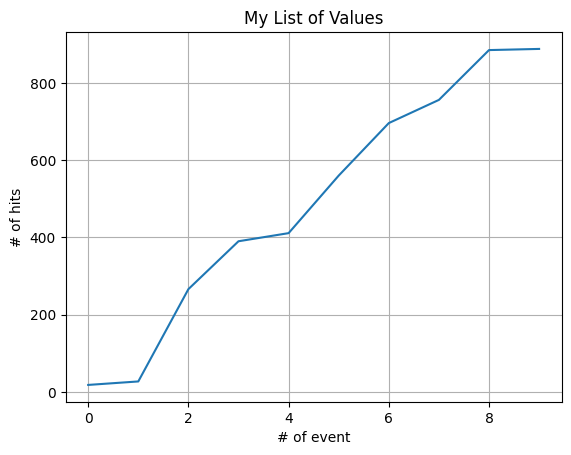

In [32]:
ordered_list = sorted(list)
plt.plot(ordered_list)

# add a title and labels for the x and y axes
plt.title('My List of Values')
plt.grid(True)
plt.xlabel('# of event')
plt.ylabel('# of hits')

# show the plot
plt.show()

## Bsphiphi

In [22]:
file_name = project_root + "/datasets/bsphiphi/velo_event_"

all_events = [i for i in range(1000)]
#random.seed(40)
#random.shuffle(all_events)
count = 0
j = 0
nr_events = len(all_events)

max_neurons_list= []
total_hits_list_bsphiphi = []
all_events_list = []


for i in all_events[:nr_events]:

        size = os.path.getsize(file_name + str(i) + ".json")
        json_data_event, modules = load_event(file_name + str(i) + ".json", plot_event=False)
        
        #data
        all_events_list.append(json_data_event)
        

        #hits
        modules_count = len(modules)

        hit_counts = [len(module.hits()) for module in modules]
        hits_total = sum(hit_counts)
        total_hits_list_bsphiphi.append(hits_total)

In [23]:
print(len(total_hits_list_bsphiphi))

1000


In [24]:
# GET THE SELECTED EVENT ID
deciles, list = events_closest_deciles(total_hits_list_bsphiphi,10)
print('Deciles values:', deciles)
print('Events ID:',list)

Deciles values: [336, 1129, 1453, 1740, 2016, 2263, 2560, 2855, 3265, 3726]
Events ID: [51, 710, 180, 250, 266, 64, 141, 308, 50, 453]


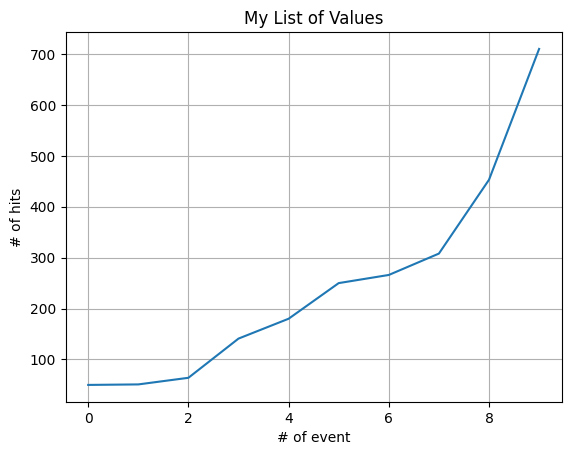

In [29]:
ordered_list = sorted(list)
plt.plot(ordered_list)

# add a title and labels for the x and y axes
plt.title('My List of Values')
plt.grid(True)
plt.xlabel('# of event')
plt.ylabel('# of hits')

# show the plot
plt.show()


